### This Notebook is part of project responcible for predicting terrorist group responcible for the event by using  features in Global Terrorism Dataset(GTD). This Notebook is devided into three sections:
### 1) Feature Selection 2) Model Selection 3) Models Optimization and Prediction

In [11]:
import pandas as pd
import numpy as np
from collections import Counter
#from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler
import time

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV, KFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Reading data from preprocessed data saved from preprocessing file previously.

In [3]:
gtd_processed = pd.read_csv("gtd_processed_features.csv", encoding='utf-8', low_memory=False)
gtd=gtd_processed

Lets look in the data again

In [4]:
print(gtd.info())
gtd.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88657 entries, 0 to 88656
Data columns (total 18 columns):
gname           88657 non-null object
iyear           88657 non-null int64
country         88657 non-null int64
crit1           88657 non-null int64
crit2           88657 non-null int64
crit3           88657 non-null int64
attacktype1     88657 non-null int64
targtype1       88657 non-null int64
targsubtype1    88657 non-null int64
weaptype1       88657 non-null int64
weapsubtype1    88657 non-null float64
ransom          88657 non-null float64
nkill           88657 non-null int64
nwound          88657 non-null int64
guncertain1     88657 non-null float64
ishostkid       88657 non-null float64
casualties      88657 non-null int64
nclass          88657 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 12.2+ MB
None


,count,mean,std,min,25%,50%,75%,max
iyear,88657.0,1999.630430,13.752983,1970.0,1988.0,2001.0,2014.0,2016.0
country,88657.0,141.015002,127.035794,4.0,61.0,137.0,182.0,1004.0
crit1,88657.0,0.997191,0.052922,0.0,1.0,1.0,1.0,1.0
crit2,88657.0,0.991281,0.092968,0.0,1.0,1.0,1.0,1.0
crit3,88657.0,0.843205,0.363610,0.0,1.0,1.0,1.0,1.0
attacktype1,88657.0,3.362476,2.077021,1.0,2.0,3.0,3.0,9.0
targtype1,88657.0,8.122822,6.576533,1.0,3.0,4.0,14.0,22.0
targsubtype1,88657.0,45.736783,30.320362,1.0,23.0,34.0,73.0,111.0
weaptype1,88657.0,6.586767,2.401062,1.0,5.0,6.0,6.0,13.0
weapsubtype1,88657.0,8.796237,6.977503,0.0,2.0,5.0,16.0,30.0


### 1) Feature Selection

Seperated target column i.e. gname and rest of the columns as features. 

In [5]:
target=gtd["gname"]
features = gtd[['iyear', 'country', 'crit1', 'crit2', 'crit3', 'attacktype1', 'targtype1',
                       'targsubtype1','weaptype1', 'weapsubtype1', 'ransom', 'nkill', 'nwound', 'guncertain1', 'ishostkid','casualties']]

In [6]:
features.head(5)

,iyear,country,crit1,crit2,crit3,attacktype1,targtype1,targsubtype1,weaptype1,weapsubtype1,ransom,nkill,nwound,guncertain1,ishostkid,casualties
0,1970,130,1,1,1,6,7,45,13,0.0,1.0,0,0,0.0,1.0,0
1,1970,217,1,1,1,2,3,22,5,5.0,0.0,0,0,0.0,0.0,0
2,1970,218,1,1,1,1,3,25,5,2.0,0.0,0,0,0.0,0.0,0
3,1970,217,1,1,1,7,4,28,8,19.0,0.0,0,0,0.0,0.0,0
4,1970,217,1,1,1,7,2,21,8,20.0,0.0,0,0,0.0,0.0,0


Scale and transform features data before doing PCA

In [36]:
Xscale = scale(features)
pca=PCA(n_components=16)
X=pca.fit_transform(Xscale)

Xscale.shape

(88657, 16)

Looking at the cummulative variance explained by features to choose minimum features required for explaining maximum variance.

[  1.51482731e-01   1.33669702e-01   1.17487887e-01   8.30438628e-02
   6.83145605e-02   6.35790906e-02   6.14434769e-02   6.03922448e-02
   5.65889979e-02   5.25655758e-02   5.16534397e-02   4.15066570e-02
   3.55953516e-02   1.87159905e-02   3.96043118e-03   3.71868879e-31]
[ 0.15148273  0.28515243  0.40264032  0.48568418  0.55399874  0.61757783
  0.67902131  0.73941356  0.79600255  0.84856813  0.90022157  0.94172823
  0.97732358  0.99603957  1.          1.        ]


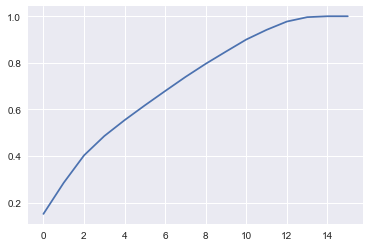

In [30]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
cumVar=pca.explained_variance_ratio_.cumsum()
plt.plot(cumVar)

We can see that 90% variation can be explained by 11 features.

In [31]:
pca=PCA(n_components=11)
reducedFeatures = pca.fit_transform(features)
reducedFeatures.shape

(88657, 11)

### 2) Model selection

Dividing reduced features data into training and validation sets

In [37]:
X_train, X_val, Y_train, Y_val = train_test_split(reducedFeatures, target, test_size=.2, random_state=0)
X_train.shape

Creating model pipeline by adding various machine learning models in an array with default parameters. Please uncomment the algorithms to try.

In [38]:
models=[]

# K-Nearest Neighbor:
models.append(("KNN", KNeighborsClassifier()))

# Linear Models
#models.append(('Logistic_Regression', LogisticRegression(n_jobs = -1, penalty = 'l1')))

#'Perceptron' : Perceptron(n_iter = 20, n_jobs = -1),
models.append(('SGD Classifier', SGDClassifier(penalty = 'l1', n_jobs = -1,)))

# Naive Bayes:
#models.append(('Gaussian Naive-Bayes', GaussianNB()))

# Decision Tree & Ensemble
#models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier',  RandomForestClassifier(n_jobs = -1,)))
#models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
#models.append(('AdA Boost Classifier', AdaBoostClassifier()))
#models.append(('Bagging Classifier', BaggingClassifier(n_jobs = -1)))

# Support Vector Machine
#models.append(('Linear SVC', LinearSVC(penalty = 'l1', dual = False)))

# Multi-Layer Perceptron (Neural Network):
#models.append(('MLP Classifier', MLPClassifier(activation = 'logistic', max_iter=4)))

Variables to store validation results and setting parameters

In [39]:
results= pd.DataFrame(columns=['model', 'score', 'time(sec)'])
scoring='accuracy'
seed=0
kFold_n_splits=2 #increase this number but with accuracy vs time to execute, trade off.

Executing cross validation steps for each model enabled above and storing results.

In [40]:
for model,n in zip(models, np.arange(len(models))):
    start_time =time.time()
    #get the Cv score
    kfold = KFold(n_splits=kFold_n_splits, random_state=seed)
    cv_score = cross_val_score(model[1], X_train, Y_train, cv=kfold, scoring=scoring)

    #storing results
    time_taken = round((time.time() - start_time),3)
    name=model[0]
    results.loc[n]=[name, cv_score.mean(), time_taken]
    msg = "%s: %.3f%% - %s seconds" % (name, cv_score.mean(), time_taken)
    print(msg)

KNN: 0.601% - 4.335 seconds
SGD Classifier: 0.148% - 12.55 seconds
Random Forest Classifier: 0.649% - 11.43 seconds


### Displaying previous past results for each algorithm as some algorithms took much longer
KNN: 0.606937% - 2.707 seconds
Logistic_Regression: 0.241015% - 165.59 seconds
SGD Classifier: 0.038181% - 8.477 seconds
Gaussian Naive-Bayes: 0.251731% - 7.302 seconds
Decision Tree Classifier: 0.646528% - 5.19 seconds
Random Forest Classifier: 0.628001% - 8.144 seconds
AdA Boost Classifier: 0.135326% - 343.342 seconds
Bagging Classifier: 0.677335% - 44.081 seconds
Linear SVC: 0.235855% - 271.354 seconds
MLP Classifier: 0.300529% - 26.864 seconds

Sort model on the base of cross validation score

In [21]:
results=results.sort_values(by = 'score', ascending = False)
results

,model,score,time(sec)
2,Random Forest Classifier,0.647769,20.448
0,KNN,0.600367,4.664
1,SGD Classifier,0.142926,32.224


Compare models visually

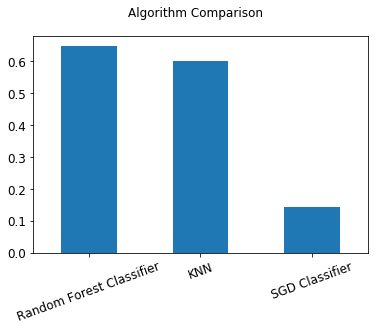

In [22]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= results["score"].plot(kind="bar", fontsize=12, rot=20)
ax.set_xticklabels( results["model"])
plt.show()

### 3) Model Optimization


Lets check prediction from the model resulted the best score above.

In [26]:
bestModel=[a[1] for a in models if a[0] == results.iloc[0]["model"]][0]
bestModel.fit(X_train, Y_train)
predictions = bestModel.predict(X_val)

print(bestModel, "\n")
print("Pradictions: \n", predictions, "\n")
print("Accuracy Score: \n {:.2f}".format(accuracy_score(Y_val, predictions)), "\n")
print(confusion_matrix(Y_val, predictions))
#print(classification_report(Y_validation, predictions))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=56, verbose=0, warm_start=False) 

Pradictions: 
 ['inkatha freedom party (ifp)'
 'national liberation army of colombia (eln)'
 'islamic state of iraq and the levant (isil)' ...
 'abu sayyaf group (asg)' 'communist party of india - maoist (cpi-maoist)'
 'narco-terrorists'] 

Accuracy Score: 
 0.68 

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Optimizing RandomForestClassifier using RandomizedSearchCV and find the best parameters. 

In [24]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', verbose=0) 
start_time = time.time()
# Use a grid over parameters of interest
n_estim = filter(lambda x: x % 9 == 0, list(range(9,50)))
param_grid = { 
           "n_estimators" : list(n_estim),
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

#param_grid = { 
#           "n_estimators" : [2,3],
#           "max_depth" : [1, 2],
#           "min_samples_leaf" : [1, 10]}

    
CV_rfc = RandomizedSearchCV(rfc, param_grid, cv= 2)
CV_rfc.fit(X_train, Y_train)
print("RamdomSearch took {:.2f} seconds".format(time.time() - start_time))

print( CV_rfc.best_params_)
print( CV_rfc.best_score_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-a2d4f8a30c45>", line 17, in <module>
    CV_rfc.fit(X_train, Y_train)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 639, in fit
    cv.split(X, y, groups)))
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py", line

KeyboardInterrupt: 

Creating same classifier using the best parameters from above optimization BUT using differnt Kfolds

In [ ]:
seed = 0

rfc = RandomForestClassifier(**CV_rfc.best_params_)
kfold = KFold(n_splits=10, random_state=seed)

# fit the model with training set
scores = cross_val_score(rfc, X_train, Y_train, cv=kfold, scoring='accuracy')
print("Train accuracy %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

# predict on testing set
preds = cross_val_predict(rfc, X_val, Y_val, cv=kfold)
print("Test accuracy %0.2f" % (100*accuracy_score(Y_val, preds)))

Optimizing now for KNN algorithm. Similarly other alogorithms can be optimized too.

In [41]:
knn = KNeighborsClassifier(n_jobs=-1)
# Range of `n_estimators` values to explore.

knnparams= {"n_neighbors": np.arange(1,31,2),
           "metric" : ["euclidean", "cityblock"]}

KNNgrid= RandomizedSearchCV(knn, knnparams, scoring=scoring)
start_time=time.time()
KNNgrid.fit(X_train, Y_train)

print("RamdomSearch took {:.2f} seconds".format(time.time() - start_time))
# fit the model with training set
print("Train accuracy %0.2f " % (KNNgrid.best_score_))

# predict on testing set
preds = KNNgrid.preds(X_val)
print("Test accuracy %0.2f" % (100*accuracy_score(Y_val, preds)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


RamdomSearch took 136.60 seconds
Train accuracy 0.63 


AttributeError: 'RandomizedSearchCV' object has no attribute 'preds'